In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('cereal.csv')
data.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


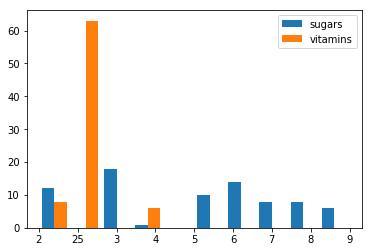

In [3]:
plt.hist(data[['sugars','vitamins']])
plt.legend(['sugars','vitamins'])
plt.show()

In [4]:
mapping ={ 'N': 'Nabisco','Q': 'Quaker Oats','K': 'Kelloggs','R': 'Raslston Purina','G': 'General Mills' ,'P' :'Post' ,'A':'American Home Foods Products'}

In [5]:
data['Manufacturer']=data['mfr'].map(mapping)
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


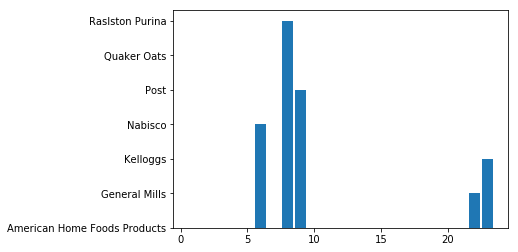

In [31]:
#df['count'] = data[['name','Manufacturer']].groupby(['Manufacturer']).agg(['count'])
df1 = data[['name','Manufacturer']].groupby(['Manufacturer']).count()
#df1['name']
#df1.index
#sorted(data['Manufacturer'].unique())
plt.bar(df1['name'],df1.index)
plt.show()

In [24]:
#import numpy as np
#np.unique(data['Manufacturer'],return_counts=True)

In [26]:
data.isnull().sum()

name            0
mfr             0
type            0
calories        0
protein         0
fat             0
sodium          0
fiber           0
carbo           0
sugars          0
potass          0
vitamins        0
shelf           0
weight          0
cups            0
rating          0
Manufacturer    0
dtype: int64

In [39]:
x =data.iloc[:,3:15]
y =data.iloc[:,15]


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
model.score(x_test,y_test)

0.9999999999999997

In [48]:
y_pred = model.predict(x_test) 

In [49]:
from sklearn import metrics
print("MSE is :",metrics.mean_squared_error(y_test,y_pred))

MSE is : 1.501261696462014e-13
